In [3]:
cd C:\Users\ysyang\Documents\yongsoo\Teaching\2025_Spring_Comp_Physics\DL_augmentation

C:\Users\ysyang\Documents\yongsoo\Teaching\2025_Spring_Comp_Physics\DL_augmentation


In [4]:
# import modules
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage, datasets, interpolate
import scipy as sp

import RadonTransform


In [5]:
# define number of Training, Valication and Test sets
NumTrainingSets = 1000
NumValidationSets = 200
NumTestSets = 10

# Tilt Angles
AngleList = np.arange(-70,70,4)

# Image Size Parameters
Dim0 = 128
Dim1 = 128

# Random Circle min / max radius for creating random shape area
RandCircleRadMin = 3. # in pixel
RandCircleRadMax = 25. # in pixel

# Minimum distance from the edge of image for the random shape
MinDistFromEdge = 5. # in pixel

# Minimum & Maximum Area
MinArea = 5000 # in pixel
MaxArea = 11000 # in pixel

# Probablity of continuing random circle addition for shape generation
ContinueLoopProb = 0.9

# Atomic Structure Parameters
AtomMinDist = 2.0   # Minimum distance between atoms in Angstrom
TargetDensityDist = 2.5 # in Angstrom,  for calculating target # of atoms in the area
TargetFillRatio = 0.90  # If this ratio of target density is achieved, atomic structure generation will stop
PixelSize = 0.4  # in Angstrom
AtomGaussSigma = 0.45 # in Angstrom

CropHalfWidth = 3  # in pixel


In [ ]:
# function for createing random 2D shape
def MaskFunction(Dim0, Dim1, MinDistFromEdge, RandCircleRadMin, RandCircleRadMax, MinArea, MaxArea, ContinueLoopProb):
    Mask = np.zeros((Dim0,Dim1))
    Grid0, Grid1 = np.meshgrid(np.arange(Dim0), np.arange(Dim1), indexing='ij')
    
    # the object should be within this big circle (outside this [i.e., very close to the corner of the image] may violate the tomography)
    bigCircle = np.sqrt( (Grid0 - (Dim0/2))**2 + (Grid1 - (Dim1/2))**2 ) < (Dim0/2-MinDistFromEdge)    
    
    ContinueFlag = True
    while ContinueFlag:
        # random numbers for x, y positions of the circle center and circle radius
        randInd0 = np.random.randint(0, Dim0)
        randInd1 = np.random.randint(0, Dim1)
        randRad = np.random.randint(RandCircleRadMin, RandCircleRadMax)

        # create small circle
        currCircle = ..... # try yourself!
    
        # ensure the random circle is fully within the big circle within MinDistFromEdge
        if np.sum(currCircle[bigCircle==0]) > 1:
            continue
    
        # ensure the mask is connected after circle addition
        elif np.sum(Mask) > 0 and Mask[randInd0, randInd1] < 1:
            continue
        
        else:
        # add the circle to current mask image
        # try yourself!
    
        # If mask size is larger than MinArea, stop with some probability.
        if np.sum(Mask) > MinArea:
            if np.random.uniform() > ContinueLoopProb:
                ContinueFlag = False
            elif np.sum(Mask) > MaxArea: # If mask size is larger than MaxArea, stop.
                ContinueFlag = False     
                
    return Mask


In [ ]:
def CreateImageFromAtomicStructure(Dim0, Dim1, AtomPosArr, AtomGaussSigma, CropHalfWidth, PixelSize):
    Image = np.zeros((Dim0,Dim1))
    gGrid0, gGrid1 = np.meshgrid(np.arange(CropHalfWidth*2+1) - CropHalfWidth , np.arange(CropHalfWidth*2+1) - CropHalfWidth, indexing='ij')

    # loop through atom positions
    for atomInd in range(AtomPosArr.shape[0]):
        # crop local area near the position
        CropInd0 = np.round(np.arange(CropHalfWidth*2+1) - CropHalfWidth + np.round(AtomPosArr[atomInd,0]))
        CropInd1 = np.round(np.arange(CropHalfWidth*2+1) - CropHalfWidth + np.round(AtomPosArr[atomInd,1]))
        
        # Add 2D Guassian function to the cropped area
        # try yourself!
        
    return Image

In [ ]:
# simulate tomography (1D -> 2D)
def CreateDataFromGT(TrainingGTImageArray, AngleArr):
    TrainingDataImageArray = np.zeros(TrainingGTImageArray.shape)
    
    for imgInd in range(TrainingGTImageArray.shape[2]):
        # generate projections (Sinogram)
        Sinogram = RadonTransform.radon_transform(TrainingGTImageArray[:,:,imgInd], AngleArr)
        
        # run reconstruction from the projections (inverse radon, filtered backprojection)
        TrainingDataImageArray[:,:,imgInd] = RadonTransform.iradon_transform(Sinogram, AngleArr, interpolation='cubic')

    return TrainingDataImageArray

In [ ]:
# gererate simulated atomic structure 2D image 
def CreateTrainingData(Dim0, Dim1, MinDistFromEdge, RandCircleRadMin, RandCircleRadMax, MinArea, MaxArea, ContinueLoopProb, 
                       NumTrainingSets, TargetDensityDist, TargetFillRatio, PixelSize, CropHalfWidth, AtomMinDist, AtomGaussSigma):
    
    TrainingGTMaskArray = np.zeros((Dim0,Dim1,NumTrainingSets))
    TrainingGTImageArray = np.zeros((Dim0,Dim1,NumTrainingSets))
    TrainingGTPosList = []
    
    Grid0, Grid1 = np.meshgrid(np.arange(Dim0), np.arange(Dim1), indexing='ij')
    
    for imgInd in range(NumTrainingSets):
    
        # create a random shape using MaskFunction
        Mask =  # try yourself!
        
        # put atoms inside the shape
        AtomPosArr = np.array([[]])    
    
        ContinueFlag = True
        
        # loop for generating atomic structure
        while ContinueFlag:        
        
            # calculate TargetNumAtoms based on the target density and fill ratio
             # try yourself!
            
            randPos0 = np.random.uniform()*Dim0
            randPos1 = np.random.uniform()*Dim1
            
            currCircle = .....  # try yourself!
        
            # ensure the atom (with radius of CropHalfWidth) is fully within the shape
            if np.sum(currCircle[Mask==0]) > 1:
                continue
        
            elif AtomPosArr.size == 0:
                AtomPosArr = np.array([[randPos0, randPos1]])
                AtomPosArr
                
            # check if the new random position violates the minimum distance constraint    
             # try yourself!
            elif .....
        
            if AtomPosArr.shape[0] > TargetNumAtoms:
                ContinueFlag = False
                
        TrainingGTMaskArray[:,:,imgInd] = Mask
        
        # create image based on the atomic structure using CreateImageFromAtomicStructure
        # try yourself!
        
        TrainingGTPosList.append(AtomPosArr)
    
    return TrainingGTImageArray, TrainingGTMaskArray, TrainingGTPosList

In [6]:
# Create Training Datasets

# Create Ground Truth Images based on Random Volume and Random Atomic Structure
TrainingGTImageArray, TrainingGTMaskArray, TrainingGTPosList = CreateTrainingData(Dim0, Dim1, MinDistFromEdge, RandCircleRadMin, RandCircleRadMax, 
                                                                            MinArea, MaxArea, ContinueLoopProb,NumTrainingSets, TargetDensityDist,
                                                                            TargetFillRatio, PixelSize, CropHalfWidth, AtomMinDist, AtomGaussSigma)

# Create Missing-Wedge and sparce-sampling corrupted data (Filtered Back Projection)
TrainingDataImageArray = CreateDataFromGT(TrainingGTImageArray, AngleList)


KeyboardInterrupt: 

In [29]:
# Save The generated data

np.save("TrainingData.npy", TrainingDataImageArray)
np.save("TrainingGT.npy", TrainingGTImageArray)
np.save("TrainingGTMask.npy", TrainingGTMaskArray)

np.save('TrainingAtomPos.npy', np.array(TrainingGTPosList, dtype=object), allow_pickle=True)

In [5]:
# Create Validation Datasets


ValidationGTImageArray, ValidationGTMaskArray, ValidationGTPosList = CreateTrainingData(Dim0, Dim1, MinDistFromEdge, RandCircleRadMin, RandCircleRadMax, 
                                                                            MinArea, MaxArea, ContinueLoopProb,NumValidationSets, TargetDensityDist,
                                                                            TargetFillRatio, PixelSize, CropHalfWidth, AtomMinDist, AtomGaussSigma)

ValidationDataImageArray = CreateDataFromGT(ValidationGTImageArray, AngleList)

In [6]:
np.save("ValidationData.npy", ValidationDataImageArray)
np.save("ValidationGT.npy", ValidationGTImageArray)
np.save("ValidationGTMask.npy", ValidationGTMaskArray)

np.save('ValidationAtomPos.npy', np.array(ValidationGTPosList, dtype=object), allow_pickle=True)

In [7]:
# Create Test Datasets

TestGTImageArray, TestGTMaskArray, TestGTPosList = CreateTrainingData(Dim0, Dim1, MinDistFromEdge, RandCircleRadMin, RandCircleRadMax, 
                                                                            MinArea, MaxArea, ContinueLoopProb,NumTestSets, TargetDensityDist,
                                                                            TargetFillRatio, PixelSize, CropHalfWidth, AtomMinDist, AtomGaussSigma)

TestDataImageArray = CreateDataFromGT(TestGTImageArray, AngleList)

In [8]:
np.save("TestData.npy", TestDataImageArray)
np.save("TestGT.npy", TestGTImageArray)
np.save("TestGTMask.npy", TestGTMaskArray)

np.save('TestAtomPos.npy', np.array(TestGTPosList, dtype=object), allow_pickle=True)

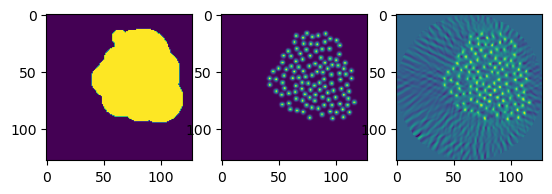

In [18]:
AA = 0
ax1 = plt.subplot(1, 3, 1)
plt.imshow(TrainingGTMaskArray[:,:,AA])
ax1 = plt.subplot(1, 3, 2)
plt.imshow(TrainingGTImageArray[:,:,AA])
ax1 = plt.subplot(1, 3, 3)
plt.imshow(TrainingDataImageArray[:,:,AA])

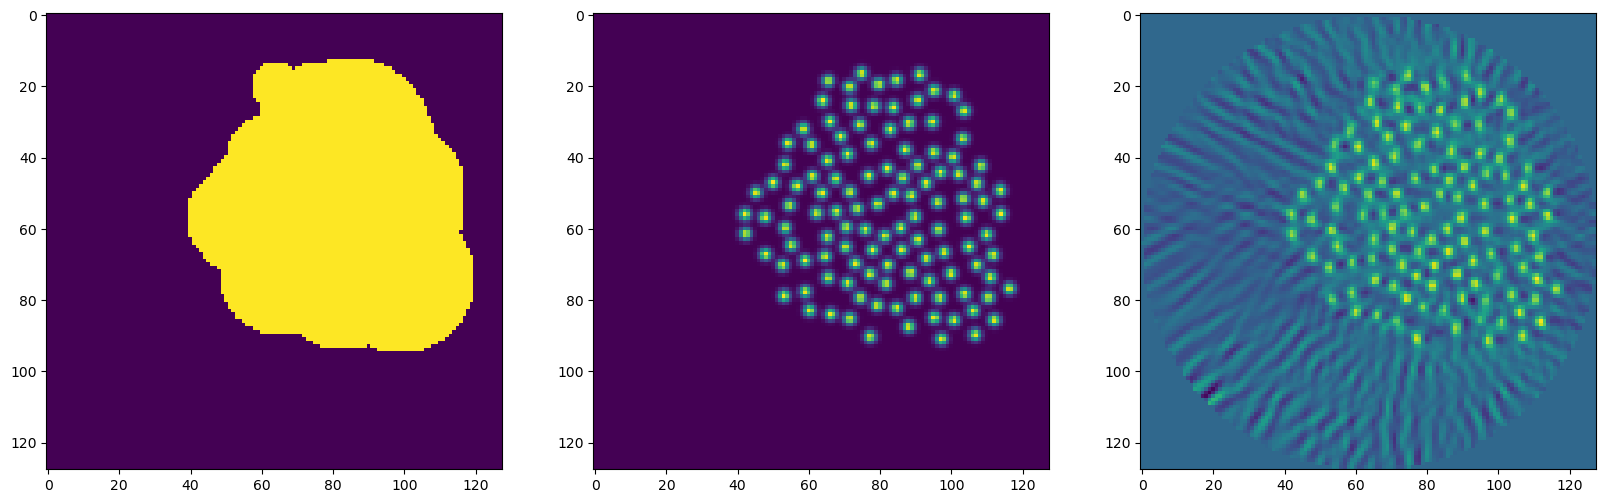

In [24]:

f = plt.figure(figsize=(20,6))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.imshow(TrainingGTMaskArray[:,:,AA])
ax2.imshow(TrainingGTImageArray[:,:,AA])
ax3.imshow(TrainingDataImageArray[:,:,AA])
